## Which Regression Method Works Best

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import codecs
import random
from collections import Counter
from IPython.core.display import HTML
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler
import urllib.request

%matplotlib inline

## Importing the Data

In [2]:
data = urllib.request.urlopen("http://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt").read()
data_str = str(data)

In [3]:
#print(data_str)

In [4]:
data_str = data_str[2:(len(data_str)-1)]

In [5]:
#print(data_str)

In [6]:
data_list = data_str.split('\\r\\n')

In [7]:
#display(data_list)

In [8]:
del data_list[len(data_list)-1]

In [9]:
data_series = pd.Series(data_list)
#display(data_series)

In [10]:
fertility = data_series.str.split(',',n=10,expand=True)
fertility.columns = ['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever',
                    'Alcohol_use','Smoking','Hours_sitting','Diagnosis']

In [22]:
display(fertility.head())

,Season,Age,Childhood_disease,Trama,Surgery,Recent_fever,Alcohol_use,Smoking,Hours_sitting,Diagnosis,DiagNum
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N,0
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O,1
2,-0.33,0.5,1,0,0,0,1,-1,0.5,N,0
3,-0.33,0.75,0,1,1,0,1,-1,0.38,N,0
4,-0.33,0.67,1,1,0,0,0.8,-1,0.5,O,1


In [12]:
fertility['DiagNum'] = fertility['Diagnosis'].apply({'N':0,'O':1}.get)

In [13]:
features = fertility[['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever',
                      'Alcohol_use','Smoking','Hours_sitting','DiagNum']]
features = features.astype('float64')

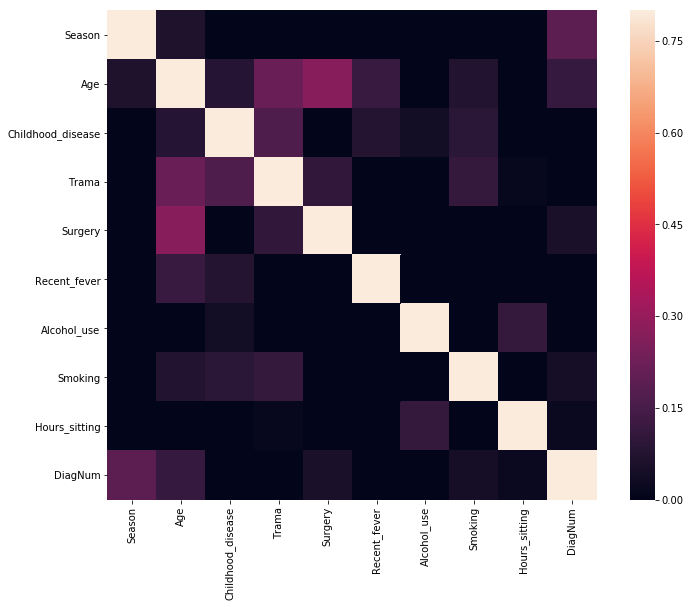

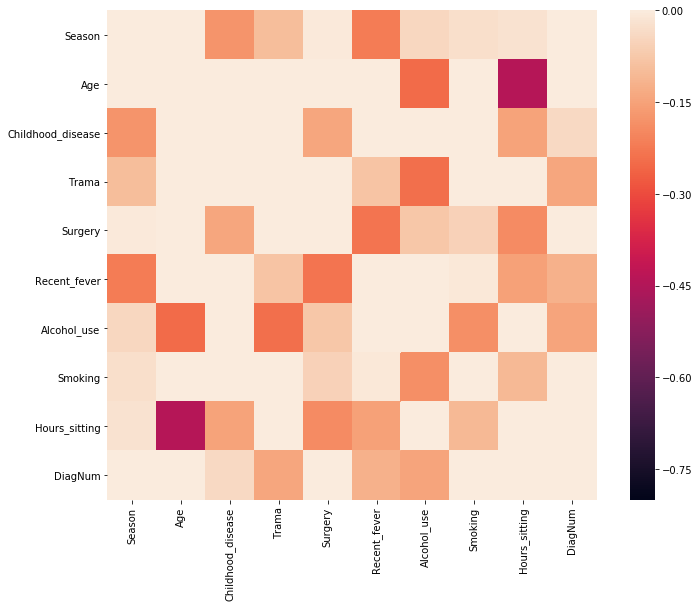

In [14]:
fcorr = features.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(fcorr, vmax=.8, vmin=-0.0, square=True)
plt.show()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(fcorr, vmax=.0, vmin=-0.8, square=True)
plt.show()

## KNN Regression

In [28]:
from sklearn import neighbors

knn = neighbors.KNeighborsRegressor(n_neighbors=2)

features_knn = ['Season','Age','Childhood_disease','Trama','Surgery','Recent_fever','Alcohol_use']
data_knn = features[features_knn]
target = features.DiagNum
knn.fit(data_knn, target)

print('\nR-squared:',knn.score(data_knn, target))


R-squared: 0.6448863636363635


## OLS Regression

In [26]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
features_ols = ['Season','Age','Childhood_disease','Trama','Recent_fever','Alcohol_use']
data_ols = features[features_ols]
target = features.DiagNum
regr.fit(data_ols, target)

print('\nCoefficients: \n', regr.coef_)
print('\nR-squared:',regr.score(data_ols, target))


Coefficients: 
 [ 0.0548078   0.33694067  0.02210961 -0.13640562 -0.07076092 -0.31152056]

R-squared: 0.10708447735690796


## Comparing Models

In [30]:
from sklearn.model_selection import cross_val_score

print('\nKNN R-squared:',knn.score(data_knn, target))

print('\nOLS R-squared:',regr.score(data_ols, target))

score_knn = cross_val_score(knn, data_knn, target, cv=5)
print("\nKNN Error: %0.2f (+/- %0.2f)" % (score_knn.mean(), score_knn.std() * 2))

score_ols = cross_val_score(regr, data_ols, target, cv=5)
print("\nOLS Error: %0.2f (+/- %0.2f)" % (score_ols.mean(), score_ols.std() * 2))


KNN R-squared: 0.6448863636363635

OLS R-squared: 0.10708447735690796

Nearest Neighbor Error: -0.62 (+/- 1.84)

Linear Regression Error: -0.24 (+/- 0.81)


It seems our data works much better with KNN type regression.  This is probably because the data is small, and there aren't as many data points to training on.  Additionally, none of the provided features has very strong correlation with the outcome, making OLS regression less effective.